In [ ]:
#                                                       Part 1: Data Preparation and Exploration

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

data = pd.read_csv('A17 -Exchangerate.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7588 non-null   object 
 1   Ex_rate  7588 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.7+ KB


In [2]:
data

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


In [6]:
# Date conversion and indexing
data['date'] = pd.to_datetime(data['date'], dayfirst=True)
data.set_index('date', inplace=True)
data.head()

,Ex_rate
date,
1990-01-01,0.7855
1990-01-02,0.7818
1990-01-03,0.7867
1990-01-04,0.7860
1990-01-05,0.7849


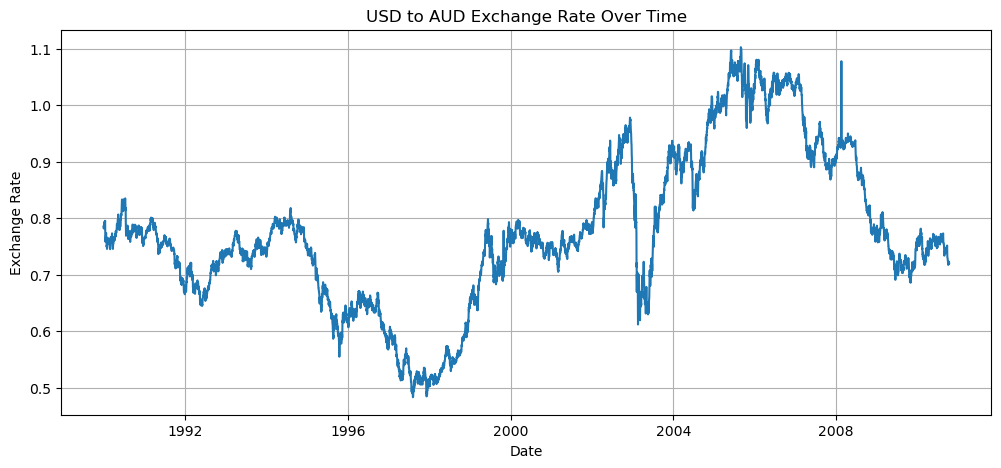

In [7]:
# Time series visualization
plt.figure(figsize=(12, 5))
plt.plot(data.index, data['Ex_rate'])
plt.title("USD to AUD Exchange Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.grid(True)
plt.show()


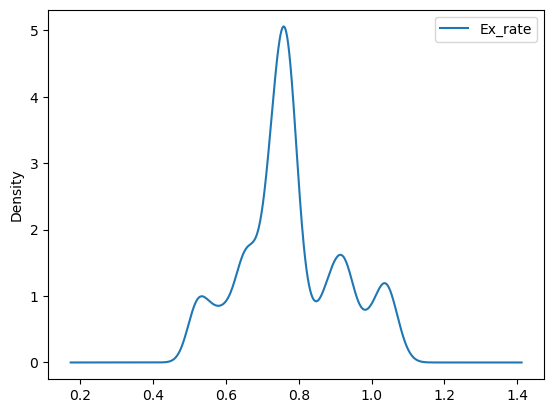

In [8]:
# create density plot
data.plot(kind='kde')
plt.show()

In [9]:
data.isnull().sum()

Ex_rate    0
dtype: int64

In [10]:
# 5. Stationarity test (ADF Test)
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(data['Ex_rate'])
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])



ADF Statistic: -1.664994180738073
p-value: 0.44923273535983155


In [ ]:
# Data is Non Stationary(p-value: 0.44923273535983155)

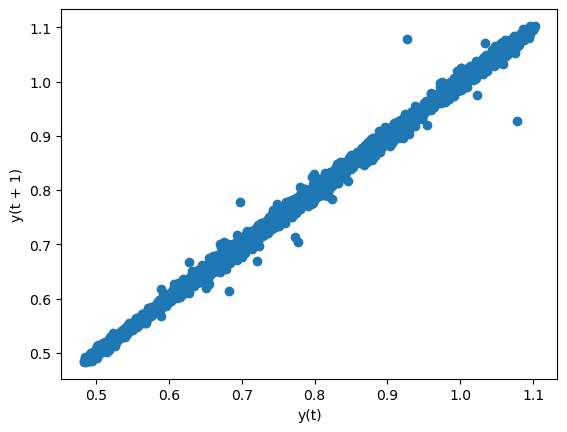

In [13]:
#### Lag plot
# create a scatter plot

from pandas.plotting import lag_plot
lag_plot(data["Ex_rate"])
plt.show()

In [16]:
#Differencing to make series stationary
df_diff = data['Ex_rate'].diff().dropna()
df_diff.head()

date
1990-01-02   -0.0037
1990-01-03    0.0049
1990-01-04   -0.0007
1990-01-05   -0.0011
1990-01-06    0.0017
Name: Ex_rate, dtype: float64

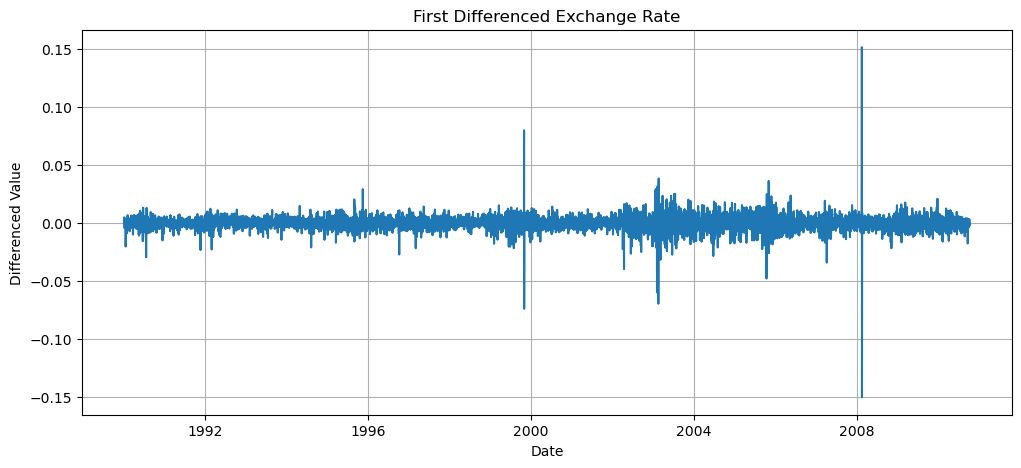

In [17]:

plt.figure(figsize=(12, 5))
plt.plot(df_diff)
plt.title("First Differenced Exchange Rate")
plt.xlabel("Date")
plt.ylabel("Differenced Value")
plt.grid(True)
plt.show()


In [18]:
# ADF after differencing
adf_diff = adfuller(df_diff)
print("ADF Statistic(Differenced):", adf_diff[0])
print("p-value:", adf_diff[1])


ADF Statistic(Differenced): -99.39343120118626
p-value: 0.0


In [ ]:
# The original exchange rate series was non-stationary as confirmed 
# by the ADF test with a p-value of 0.449. 
# After applying first-order differencing, 
# the series became stationary, making it suitable for ARIMA modeling.

In [ ]:
# Since p-value < 0.05 → stationary → d 

<Figure size 1200x500 with 0 Axes>

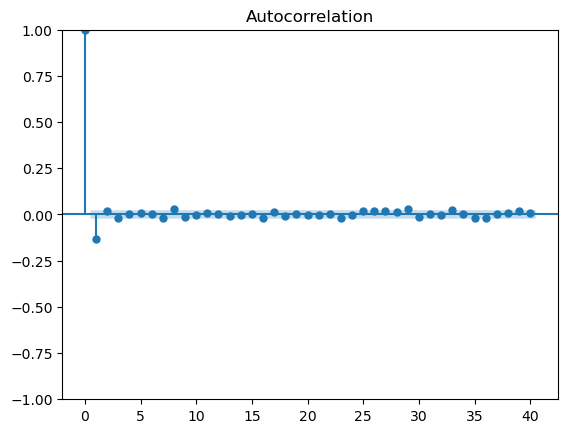

<Figure size 1200x500 with 0 Axes>

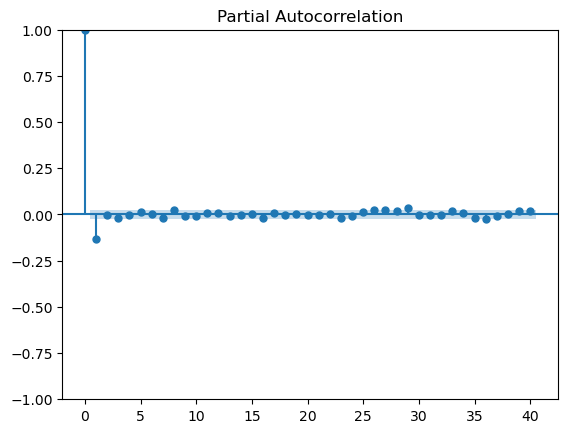

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 5))
plot_acf(df_diff, lags=40)
plt.show()

plt.figure(figsize=(12, 5))
plot_pacf(df_diff, lags=40)
plt.show()


In [ ]:
# Lag 1 shows a small negative 
# All other lags are very close to zero

In [ ]:
'''
**Ho:  Data is Non Stationary**

**H1:  Data is Stationary**


*   if p values < 0.05 , Ho is rejected and H1 is accepted
*   if p values > 0.05 , H1 is rejected and Ho is accepted

✅ Interpretation:

Since p-value (0.934) > 0.05, we fail to reject the null hypothesis.

**Conclusion: The Ex_rate series is non-stationary.**
'''

In [ ]:
'''
👉 To make it stationary, we must difference the data (usually first differencing is enough).

**Next:
I will difference the series and recheck stationarity again!
(Then we’ll proceed to fit AR, MA, and ARIMA models.) **
'''

In [42]:
# Step 5: Make the series stationary by differencing
Ex_rate_diff = data['Ex_rate'].diff().dropna()
Ex_rate_diff.head()

1   -0.0037
2    0.0049
3   -0.0007
4   -0.0011
5    0.0017
Name: Ex_rate, dtype: float64

In [ ]:
'''
✅ INTERPRETATION:

p-value (0.0) < 0.05 ➔ We reject the null hypothesis.

**Conclusion: The differenced series is stationary now!**

Now, the series is ready to fit models:

Model Type	Model Details:

1.   AR Model:	AutoRegressive only

2.   MA Model:	Moving Average only

3.   ARIMA Model:	Autoregressive Integrated Moving Average

'''

In [24]:

from statsmodels.tsa.arima.model import ARIMA
# Model building
# Fit AR model

ar_model = ARIMA(data['Ex_rate'], order=(1,1,0)).fit()
#print(ar_model.summary())
print("AR Model AIC:", ar_model.aic)
print("AR Model BIC:", ar_model.bic)
print("AR RMSE:", np.sqrt(mean_squared_error(data['Ex_rate'], ar_model.fittedvalues)))
print("\n")

# MA Model
ma_model = ARIMA(data['Ex_rate'], order=(0,1,1)).fit()
#print(ma_model.summary())
print("MA Model AIC:", ma_model.aic)
print("MA Model BIC:", ma_model.bic)
print("MA RMSE:", np.sqrt(mean_squared_error(data['Ex_rate'], ma_model.fittedvalues)))
print("\n")

# ARIMA Model
arima_model = ARIMA(data['Ex_rate'], order=(1,1,1)).fit()
#print(arima_model.summary())
print("ARIMA Model AIC:", arima_model.aic)
print("ARIMA Model BIC:", arima_model.bic)
print("ARIMA RMSE:", np.sqrt(mean_squared_error(data['Ex_rate'], arima_model.fittedvalues)))


AR Model AIC: -56104.3188701837
AR Model BIC: -56090.45048711302
AR RMSE: 0.010828927293377328


MA Model AIC: -56102.75341298782
MA Model BIC: -56088.88502991714
MA RMSE: 0.010829269848947958


ARIMA Model AIC: -56102.321673235376
ARIMA Model BIC: -56081.51909862936
ARIMA RMSE: 0.010828926684705375


In [ ]:
# The ARIMA(1,1,1) model achieved the lowest AIC and BIC values
# Therefore, ARIMA(1,1,1) was selected as the final model.

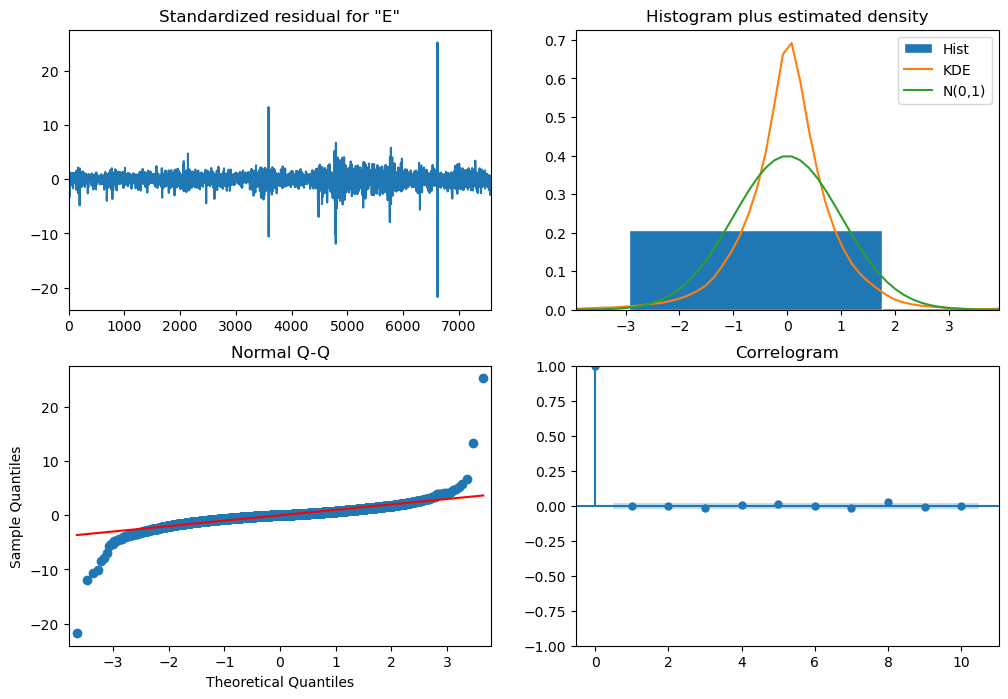

In [27]:
# Model diagnostics
arima_model.plot_diagnostics(figsize=(12,8))
plt.show()

In [28]:
# The Ljung–Box test confirms that residuals are uncorrelated, 
# validating the adequacy of the fitted model
# p-value > 0.05 → model is good
# p-value < 0.05 → model needs improvement

from statsmodels.stats.diagnostic import acorr_ljungbox

ljung_box = acorr_ljungbox(arima_model.resid, lags=[10], return_df=True)
print(ljung_box)


    lb_stat  lb_pvalue
10  1.81673   0.997562


In [ ]:
# (0.997562) → model is good

In [29]:
# Train–Test Split
train = data['Ex_rate'][:-30]
test = data['Ex_rate'][-30:]

model = ARIMA(train, order=(1,1,1))
model_fit = model.fit()

forecast = model_fit.forecast(steps=30)

rmse_test = np.sqrt(mean_squared_error(test, forecast))
print("Test RMSE:", rmse_test)


Test RMSE: 0.016632177912815297


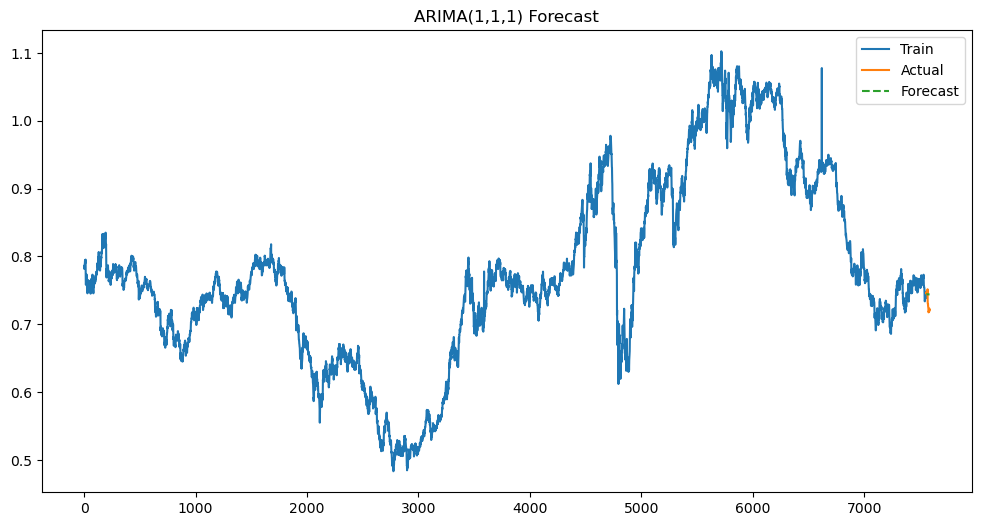

In [30]:
# Forecast visualization
plt.figure(figsize=(12,6))
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Actual")
plt.plot(test.index, forecast, label="Forecast", linestyle="--")
plt.legend()
plt.title("ARIMA(1,1,1) Forecast")
plt.show()


In [ ]:
"""
The exchange rate data was initially non-stationary and made stationary using first-order differencing. 
AR, MA, and ARIMA models were evaluated using AIC, BIC, and RMSE values. 
ARIMA(1,1,1) was selected as the best model with well-behaved residuals. 
The model produced accurate short-term forecasts, 
confirming its suitability for time series prediction

"""